# NYC Hospital Chargemaster: Data Aggregator
### By Margaret Smiley, August 2020

### What's the issue with Hospital Pricing in the U.S.?
In the U.S. understanding health care costs is complicated, to say the least. This lack of understanding is driven by limited transparency around pricing for health care services and procedures.

In order to address the lack of transparency, The Federal governing body, the Center for Medicaid and Medicare Services (CMS), passed a mandate ordering hospital systems to make their Chargemasters publicly available on their websites. Chargemasters (Charge Description Masters) are list prices of how much the most common procedure or product costs within that hospital system, on average throughout the year. 

Since the passage of this mandate, many hospitals have complied, but there is one substantial problem in making them usable: the Chargemasters are often hidden across countless hospital websites in a wide array of formats. 

### Example of charges on a hospital website:
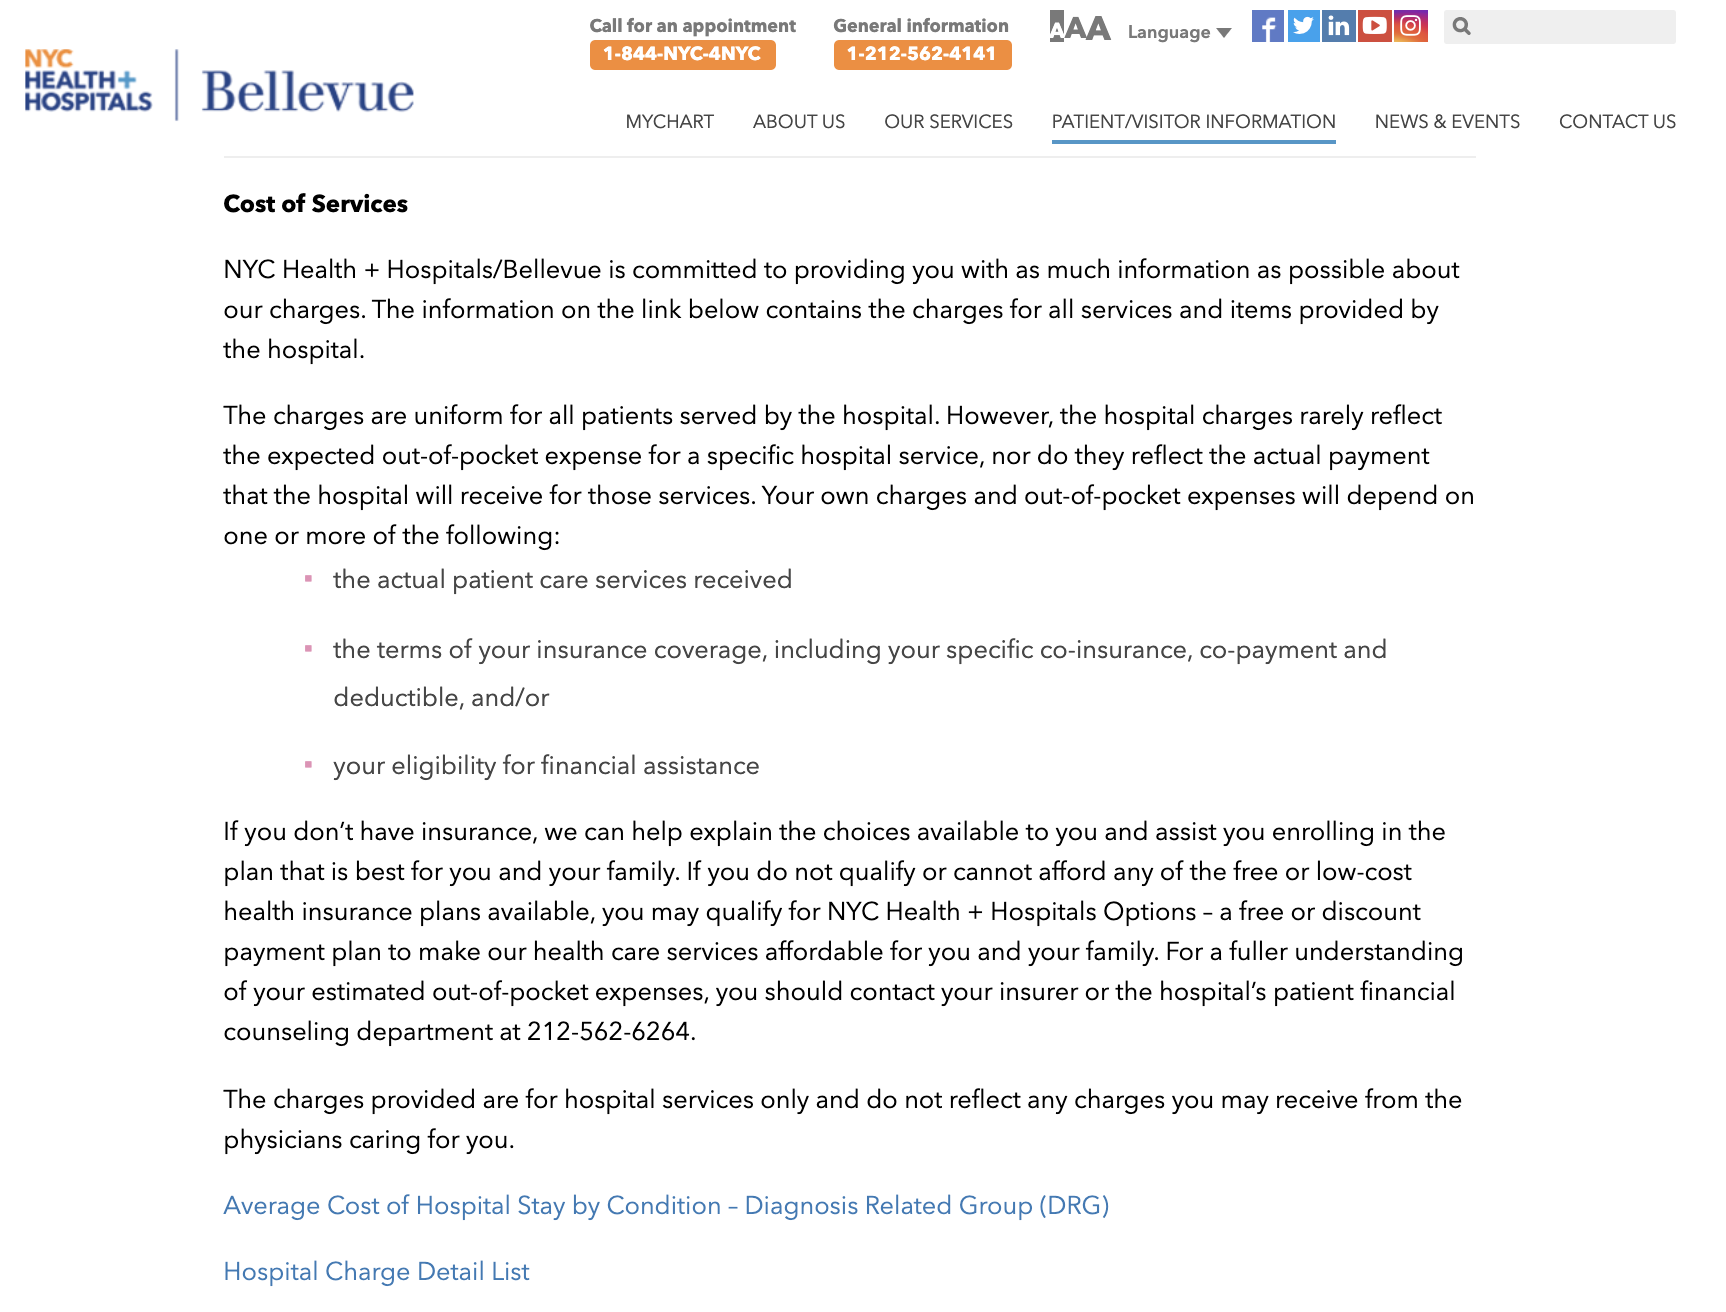

### How can data be used to solve this issue?
Differing and hidden sources for hospital pricing makes it difficult, if not impossible, to understand and analyze hospital costs or price compare options. The following project demonstrates how Python can be used to solve for this persistent issue in health care.

This code provides an aggregator for these Chargemasters across 18 acute general hospitals in New York City and develops a readable output to have clean, accessible, and singular point of reference for service costs across hospitals.

Having this data aggregated together as a single dataset allows for data analysis and applications that can be used to inform individuals on the cost of care. This code provides high-level analysis and functions for search capabilities available with this data.

### About the Hospital Data
The aggregator pulls data from 18 acute care hospitals in the Bronx, Brooklyn, Manhattan and Queens within New York city. The data was pulled in August 2020 from the following hospital websites:
- Mount Sinai
- Mount Sinai Beth Isreal
- Mount Sinai Brooklyn
- Mount Sinai Morningside
- Mount Sinai Queens
- Mount Sinai West
- Montefiore
- New York Presbyterian
- Bellevue
- Coney Island
- Elmhurst
- Harlem
- Jacobi
- Kings County
- Lincoln
- Metropolitan
- Queens
- Woodhull

The following code imports these files, cleans, standardizes (adding unified columns and headers), and merges them into a single source.

### About Code Dependencies:
The following code utilizes:
- `pandas` for data manipulation and cleaning
- `xlrd` for loading and reading data sources in Excel
- `csv` for writing to a CSV
- `gspread` to output to Google Spreadsheets
- `oauth2client` to connect to Google's API
- `numpy` for mathematical functions
- `matplotlib` for graphic capabilities

If you do not have these dependencies, please install them first with `pip install`.

In [1]:
#Import Dependencies
import pandas as pd
import xlrd
import csv
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Bellevue: Import Data Source
bellevue_drg = pd.read_excel('data/nyc/public/bellevue/charges-by-DRG-FY2017.xlsx')

In [4]:
#Bellevue: Clean & Standardize Data Frame
bellevue_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
bellevue_drg['drg_type'] = 'MS'
bellevue_drg['hospital'] = 'BELLEVUE'
bellevue_drg['hospital_type'] = 'PUBLIC'
bellevue_drg['year'] = 2017
bellevue_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
bellevue_drg['street_address'] = '462 FIRST AVENUE'
bellevue_drg['city'] = 'NEW YORK'
bellevue_drg['zip'] = '10016'
bellevue_drg['borough'] = 'MANHATTAN'
bellevue_drg['state'] = 'NY'
bellevue_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
bellevue_drg['avg_charge'] = bellevue_drg['avg_charge'].astype(float)

In [5]:
#Coney Island: Import Data Source
coney_island_drg = pd.read_excel('data/nyc/public/coney_island/charges-by-DRG-FY2017.xlsx')

In [6]:
#Coney Island: Clean & Standardize Data Frame
coney_island_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
coney_island_drg['drg_type'] = 'MS'
coney_island_drg['hospital'] = 'CONEY ISLAND'
coney_island_drg['hospital_type'] = 'PUBLIC'
coney_island_drg['year'] = 2017
coney_island_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
coney_island_drg['street_address'] = '2601 OCEAN PARKWAY'
coney_island_drg['city'] = 'BROOKLYN'
coney_island_drg['zip'] = '11235'
coney_island_drg['borough'] = 'BROOKLYN'
coney_island_drg['state'] = 'NY'
coney_island_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
coney_island_drg['avg_charge'] = coney_island_drg['avg_charge'].astype(float)

In [7]:
#Elmhurst: Import Data Source
elmhurst_drg = pd.read_excel('data/nyc/public/elmhurst/charges-by-DRG-FY2017.xlsx')

In [8]:
#Elmhurst: Clean & Standardize Data Frame
elmhurst_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
elmhurst_drg['drg_type'] = 'MS'
elmhurst_drg['hospital'] = 'ELMHURST'
elmhurst_drg['hospital_type'] = 'PUBLIC'
elmhurst_drg['year'] = 2017
elmhurst_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
elmhurst_drg['street_address'] = '79-01 BROADWAY'
elmhurst_drg['city'] = 'ELMHURST'
elmhurst_drg['zip'] = '11373'
elmhurst_drg['borough'] = 'QUEENS'
elmhurst_drg['state'] = 'NY'
elmhurst_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
elmhurst_drg['avg_charge'] = elmhurst_drg['avg_charge'].astype(float)

In [9]:
#Harlem: Import Data Source
harlem_drg = pd.read_excel('data/nyc/public/harlem/charges-by-DRG-FY2017.xlsx')

In [10]:
#Harlem: Clean & Standardize Data Frame
harlem_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
harlem_drg['drg_type'] = 'MS'
harlem_drg['hospital'] = 'HARLEM'
harlem_drg['hospital_type'] = 'PUBLIC'
harlem_drg['year'] = 2017
harlem_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
harlem_drg['street_address'] = '506 LENOX AVENUE'
harlem_drg['city'] = 'NEW YORK'
harlem_drg['zip'] = '10037'
harlem_drg['borough'] = 'MANHATTAN'
harlem_drg['state'] = 'NY'
harlem_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
harlem_drg['avg_charge'] = harlem_drg['avg_charge'].astype(float)

In [11]:
#Jacobi: Import Data Source
jacobi_drg = pd.read_excel('data/nyc/public/jacobi/charges-by-DRG-FY2017.xlsx')

In [12]:
#Jacobi: Clean & Standardize Data Frame
jacobi_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
jacobi_drg['drg_type'] = 'MS'
jacobi_drg['hospital'] = 'JACOBI'
jacobi_drg['hospital_type'] = 'PUBLIC'
jacobi_drg['year'] = 2017
jacobi_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
jacobi_drg['street_address'] = '1400 PELHAM PARKWAY SOUTH'
jacobi_drg['city'] = 'BRONX'
jacobi_drg['zip'] = '10461'
jacobi_drg['borough'] = 'BRONX'
jacobi_drg['state'] = 'NY'
jacobi_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
jacobi_drg['avg_charge'] = jacobi_drg['avg_charge'].astype(float)

In [13]:
#Kings County: Import Data Source
kings_drg = pd.read_excel('data/nyc/public/kings_county/charges-by-DRG-FY2017.xlsx')

In [14]:
#Kings County: Clean & Standardize Data Frame
kings_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
kings_drg['drg_type'] = 'MS'
kings_drg['hospital'] = 'KINGS COUNTY'
kings_drg['hospital_type'] = 'PUBLIC'
kings_drg['year'] = 2017
kings_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
kings_drg['street_address'] = '451 CLARKSON AVENUE'
kings_drg['city'] = 'BROOKLYN'
kings_drg['zip'] = '11203'
kings_drg['borough'] = 'BROOKLYN'
kings_drg['state'] = 'NY'
kings_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
kings_drg['avg_charge'] = kings_drg['avg_charge'].astype(float)

In [15]:
#Lincoln: Import Data Source
lincoln_drg = pd.read_excel('data/nyc/public/lincoln/charges-by-DRG-FY2017.xlsx')

In [16]:
#Lincoln: Clean & Standardize Data Frame
lincoln_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
lincoln_drg['drg_type'] = 'MS'
lincoln_drg['hospital'] = 'LINCOLN'
lincoln_drg['hospital_type'] = 'PUBLIC'
lincoln_drg['year'] = 2017
lincoln_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
lincoln_drg['street_address'] = '234 EAST 149TH STREET'
lincoln_drg['city'] = 'BRONX'
lincoln_drg['zip'] = '10451'
lincoln_drg['borough'] = 'BRONX'
lincoln_drg['state'] = 'NY'
lincoln_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
lincoln_drg['avg_charge'] = lincoln_drg['avg_charge'].astype(float)

In [17]:
#Metropolitan: Import Data Source
metropolitan_drg = pd.read_excel('data/nyc/public/metropolitan/charges-by-DRG-FY2017.xlsx')

In [18]:
#Metropolitan: Clean & Standardize Data Frame
metropolitan_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
metropolitan_drg['drg_type'] = 'MS'
metropolitan_drg['hospital'] = 'METROPOLITAN'
metropolitan_drg['hospital_type'] = 'PUBLIC'
metropolitan_drg['year'] = 2017
metropolitan_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
metropolitan_drg['street_address'] = '1901 FIRST AVENUE'
metropolitan_drg['city'] = 'NEW YORK'
metropolitan_drg['zip'] = '10029'
metropolitan_drg['borough'] = 'MANHATTAN'
metropolitan_drg['state'] = 'NY'
metropolitan_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
metropolitan_drg['avg_charge'] = metropolitan_drg['avg_charge'].astype(float)

In [19]:
#North Central Bronx: Import Data Source
north_central_bronx_drg = pd.read_excel('data/nyc/public/north_central_bronx/charges-by-DRG-FY2017.xlsx')

In [20]:
#North Central Bronx: Clean & Standardize Data Frame
north_central_bronx_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
north_central_bronx_drg['drg_type'] = 'MS'
north_central_bronx_drg['hospital'] = 'NORTH CENTRAL BRONX'
north_central_bronx_drg['hospital_type'] = 'PUBLIC'
north_central_bronx_drg['year'] = 2017
north_central_bronx_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
north_central_bronx_drg['street_address'] = '3424 KOSSUTH AVENUE'
north_central_bronx_drg['city'] = 'BRONX'
north_central_bronx_drg['zip'] = '10467'
north_central_bronx_drg['borough'] = 'BRONX'
north_central_bronx_drg['state'] = 'NY'
north_central_bronx_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
north_central_bronx_drg['avg_charge'] = north_central_bronx_drg['avg_charge'].astype(float)

In [21]:
#Queens: Import Data Source
queens_drg = pd.read_excel('data/nyc/public/queens/charges-by-DRG-FY2017.xlsx')

In [22]:
#Queens: Clean & Standardize Data Frame
queens_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
queens_drg['drg_type'] = 'MS'
queens_drg['hospital'] = 'QUEENS'
queens_drg['hospital_type'] = 'PUBLIC'
queens_drg['year'] = 2017
queens_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
queens_drg['street_address'] = '82-68 164TH STREET'
queens_drg['city'] = 'JAMAICA'
queens_drg['zip'] = '11432'
queens_drg['borough'] = 'QUEENS'
queens_drg['state'] = 'NY'
queens_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
queens_drg['avg_charge'] = queens_drg['avg_charge'].astype(float)

In [23]:
#Woodhull: Import Data Source
woodhull_drg = pd.read_excel('data/nyc/public/woodhull/charges-by-DRG-FY2017.xlsx')

In [24]:
#Woodhull: Clean & Standardize Data Frame
woodhull_drg.columns=['drg', 'drg_description', 'avg_charge', 'count_discharges']
woodhull_drg['drg_type'] = 'MS'
woodhull_drg['hospital'] = 'WOODHULL'
woodhull_drg['hospital_type'] = 'PUBLIC'
woodhull_drg['year'] = 2017
woodhull_drg['source_file'] = 'charges-by-DRG-FY2017.xlsx'
woodhull_drg['street_address'] = '760 BROADWAY'
woodhull_drg['city'] = 'BROOKLYN'
woodhull_drg['zip'] = '11206'
woodhull_drg['borough'] = 'BROOKLYN'
woodhull_drg['state'] = 'NY'
woodhull_drg['parent_company'] = 'NYC HEALTH AND HOSPITALS'
woodhull_drg['avg_charge'] = woodhull_drg['avg_charge'].astype(float)

#### Note on Public Hospitals in NYC
NYC operates public hospitals through a parent organization called NYC Health and Hospitals Corporation. Due to this, the format of the above public hospitals is the same, allowing them to be merged together with no additional manipulation.

In [25]:
#NYC Health and Hospitals: Merge Cleaned Data Frames
nyc_hhc_drg = pd.concat([bellevue_drg, 
                    coney_island_drg,
                    elmhurst_drg,
                    harlem_drg,
                    jacobi_drg,
                    kings_drg,
                    lincoln_drg,
                    metropolitan_drg,
                    queens_drg,
                    woodhull_drg],
                        ignore_index=True)

In [26]:
#Mount Sinai: Import Data Source
mount_sinai_main_drg = pd.read_excel('data/nyc/private/mount_sinai/Average Charges by DRG_MSH.xlsx')

In [27]:
#Mount Sinai: Clean & Standardize Data Frame
mount_sinai_main_drg.columns=['drg', 'drg_description', 'avg_charge']
mount_sinai_main_drg['drg_type'] = 'MS'
mount_sinai_main_drg['hospital'] = 'MOUNT SINAI'
mount_sinai_main_drg['hospital_type'] = 'PRIVATE'
mount_sinai_main_drg['year'] = 2020
mount_sinai_main_drg['source_file'] = 'Average Charges by DRG_MSH.xlsx'
mount_sinai_main_drg['street_address'] = '1 GUSTAVE L. LEVY PLACE'
mount_sinai_main_drg['city'] = 'NEW YORK'
mount_sinai_main_drg['zip'] = '10029'
mount_sinai_main_drg['borough'] = 'MANHATTAN'
mount_sinai_main_drg['state'] = 'NY'
mount_sinai_main_drg['parent_company'] = 'MOUNT SINAI'
mount_sinai_main_drg['avg_charge'] = mount_sinai_main_drg['avg_charge'].astype(float)

In [28]:
#Mount Sinai Beth Israel: Import Data Source
mount_sinai_beth_israel_drg = pd.read_excel('data/nyc/private/mount_sinai_beth_israel/Average Charge by DRG_MSBI.xlsx')

In [29]:
#Mount Sinai Beth Israel: Clean & Standardize Data Frame
mount_sinai_beth_israel_drg.columns=['drg', 'drg_description', 'avg_charge']
mount_sinai_beth_israel_drg['drg_type'] = 'MS'
mount_sinai_beth_israel_drg['hospital'] = 'MOUNT SINAI BETH ISREAL'
mount_sinai_beth_israel_drg['hospital_type'] = 'PRIVATE'
mount_sinai_beth_israel_drg['year'] = 2020
mount_sinai_beth_israel_drg['source_file'] = 'Average Charge by DRG_MSBI.xlsx'
mount_sinai_beth_israel_drg['street_address'] = '281 FIRST AVENUE'
mount_sinai_beth_israel_drg['city'] = 'NEW YORK'
mount_sinai_beth_israel_drg['zip'] = '10003'
mount_sinai_beth_israel_drg['borough'] = 'MANHATTAN'
mount_sinai_beth_israel_drg['state'] = 'NY'
mount_sinai_beth_israel_drg['parent_company'] = 'MOUNT SINAI'
mount_sinai_beth_israel_drg['avg_charge'] = mount_sinai_beth_israel_drg['avg_charge'].astype(float)

In [30]:
#Mount Sinai Brooklyn: Import Data Source
mount_sinai_brooklyn_drg = pd.read_excel('data/nyc/private/mount_sinai_brooklyn/Average Charge by DRG_MSBI.xlsx')

In [31]:
#Mount Sinai Brooklyn: Clean & Standardize Data Frame
mount_sinai_brooklyn_drg.columns=['drg', 'drg_description', 'avg_charge']
mount_sinai_brooklyn_drg['drg_type'] = 'MS'
mount_sinai_brooklyn_drg['hospital'] = 'MOUNT SINAI BROOKLYN'
mount_sinai_brooklyn_drg['hospital_type'] = 'PRIVATE'
mount_sinai_brooklyn_drg['year'] = 2020
mount_sinai_brooklyn_drg['source_file'] = 'Average Charge by DRG_MSBI.xlsx'
mount_sinai_brooklyn_drg['street_address'] = '3201 KINGS HIGHWAY'
mount_sinai_brooklyn_drg['city'] = 'BROOKLYN'
mount_sinai_brooklyn_drg['zip'] = '11234'
mount_sinai_brooklyn_drg['borough'] = 'BROOKLYN'
mount_sinai_brooklyn_drg['state'] = 'NY'
mount_sinai_brooklyn_drg['parent_company'] = 'MOUNT SINAI'
mount_sinai_brooklyn_drg['avg_charge'] = mount_sinai_brooklyn_drg['avg_charge'].astype(float)

In [32]:
#Mount Sinai Morningside: Import Data Source
mount_sinai_morningside_drg = pd.read_excel('data/nyc/private/mount_sinai_morningside/Average Charge by DRG_MSL.xlsx')

In [33]:
#Mount Sinai Morningside: Clean & Standardize Data Frame
mount_sinai_morningside_drg.columns=['drg', 'drg_description', 'avg_charge']
mount_sinai_morningside_drg['drg_type'] = 'MS'
mount_sinai_morningside_drg['hospital'] = 'MOUNT SINAI MORNINGSIDE'
mount_sinai_morningside_drg['hospital_type'] = 'PRIVATE'
mount_sinai_morningside_drg['year'] = 2020
mount_sinai_morningside_drg['source_file'] = 'Average Charge by DRG_MSL.xlsx'
mount_sinai_morningside_drg['street_address'] = '1111 AMSTERDAM AVENUE'
mount_sinai_morningside_drg['city'] = 'NEW YORK'
mount_sinai_morningside_drg['zip'] = '10025'
mount_sinai_morningside_drg['borough'] = 'MANHATTAN'
mount_sinai_morningside_drg['state'] = 'NY'
mount_sinai_morningside_drg['parent_company'] = 'MOUNT SINAI'
mount_sinai_morningside_drg['avg_charge'] = mount_sinai_morningside_drg['avg_charge'].astype(float)

In [34]:
#Mount Sinai Queens: Import Data Source
mount_sinai_queens_drg = pd.read_excel('data/nyc/private/mount_sinai_queens/Average Charges by DRG_MSH.xlsx')

In [35]:
#Mount Sinai Queens: Clean & Standardize Data Frame
mount_sinai_queens_drg.columns=['drg', 'drg_description', 'avg_charge']
mount_sinai_queens_drg['drg_type'] = 'MS'
mount_sinai_queens_drg['hospital'] = 'MOUNT SINAI QUEENS'
mount_sinai_queens_drg['hospital_type'] = 'PRIVATE'
mount_sinai_queens_drg['year'] = 2020
mount_sinai_queens_drg['source_file'] = 'Average Charges by DRG_MSH.xlsx'
mount_sinai_queens_drg['street_address'] = '25-10 30TH AVENUE'
mount_sinai_queens_drg['city'] = 'ASTORIA'
mount_sinai_queens_drg['zip'] = '11102'
mount_sinai_queens_drg['borough'] = 'QUEENS'
mount_sinai_queens_drg['state'] = 'NY'
mount_sinai_queens_drg['parent_company'] = 'MOUNT SINAI'
mount_sinai_queens_drg['avg_charge'] = mount_sinai_queens_drg['avg_charge'].astype(float)

In [36]:
#Mount Sinai West: Import Data Source
mount_sinai_west_drg = pd.read_excel('data/nyc/private/mount_sinai_west/Average Charge by DRG_MSL.xlsx')

In [37]:
#Mount Sinai West: Clean & Standardize Data Frame
mount_sinai_west_drg.columns=['drg', 'drg_description', 'avg_charge']
mount_sinai_west_drg['drg_type'] = 'MS'
mount_sinai_west_drg['hospital'] = 'MOUNT SINAI WEST'
mount_sinai_west_drg['hospital_type'] = 'PRIVATE'
mount_sinai_west_drg['year'] = 2020
mount_sinai_west_drg['source_file'] = 'Average Charge by DRG_MSL.xlsx'
mount_sinai_west_drg['street_address'] = '1000 TENTH AVENUE'
mount_sinai_west_drg['city'] = 'NEW YORK'
mount_sinai_west_drg['zip'] = '10019'
mount_sinai_west_drg['borough'] = 'MANHATTAN'
mount_sinai_west_drg['state'] = 'NY'
mount_sinai_west_drg['parent_company'] = 'MOUNT SINAI'
mount_sinai_west_drg['avg_charge'] = mount_sinai_west_drg['avg_charge'].astype(float)

#### Note on Mount Sinai
Mount Sinai operates multiple hospital systems. As the parent organization, the format of the above Mount Sinai is the same, allowing them to be merged together with no additional manipulation.

In [38]:
#Mount Sinai-All: Merge Cleaned Data Frames
mount_sinai_drg = pd.concat([mount_sinai_main_drg, 
                    mount_sinai_beth_israel_drg,
                    mount_sinai_brooklyn_drg,
                    mount_sinai_morningside_drg,
                    mount_sinai_queens_drg,
                    mount_sinai_west_drg],
                        ignore_index=True)

In [39]:
#Montefiore: Import Data Source
montefiore_drg = pd.read_excel('data/nyc/private/montefiore/Average-Charges-By-DRG-MMC.xlsx')

In [40]:
#Montefiore: Clean & Standardize Data Frame
montefiore_drg.columns=['drg', 'drg_description', 'drg_weight', 'count_cases', 'avg_charge', 'run_date']
montefiore_drg = montefiore_drg.drop(['run_date'], axis=1)
montefiore_drg = montefiore_drg.drop([0, 1, 747, 748])
montefiore_drg['drg_type'] = 'MS'
montefiore_drg['hospital'] = 'MONTEFIORE'
montefiore_drg['hospital_type'] = 'PRIVATE'
montefiore_drg['year'] = 2019
montefiore_drg['source_file'] = 'Average-Charges-By-DRG-MMC.xlsx'
montefiore_drg['street_address'] = '111 E 210TH ST'
montefiore_drg['city'] = 'BRONX'
montefiore_drg['zip'] = '10467'
montefiore_drg['borough'] = 'BRONX'
montefiore_drg['state'] = 'NY'
montefiore_drg['parent_company'] = 'MONTEFIORE HEALTH SYSTEM, INC.'
montefiore_drg['avg_charge'] = montefiore_drg['avg_charge'].astype(float)

In [41]:
#New York Presbyterian: Import Data Source
nyp_drg = pd.read_excel('data/nyc/private/nyp/NYP-Charge-Per-Case-MS-DRG.xlsx')

nyp_drg.head(5)

,NewYork-Presbyterian Average Charge Per Case by MS DRG,Unnamed: 1
0,NaN,NaN
1,MS DRG,Average Charge per Case
2,1,1.67467e+06
3,2,1.08717e+06
4,3,1.40257e+06


In [42]:
#New York Presbyterian: Clean & Standardize Data Frame
nyp_drg = nyp_drg.drop([0, 1])
nyp_drg.columns= ['drg', 'avg_charge']
nyp_drg['drg_type'] = 'MS'
nyp_drg['hospital'] = 'NEW YORK PRESBYTERIAN'
nyp_drg['hospital_type'] = 'PRIVATE'
nyp_drg['year'] = 2020
nyp_drg['source_file'] = 'NYP-Charge-Per-Case-MS-DRG.xlsx'
nyp_drg['street_address'] = '525 EAST 68TH STREET'
nyp_drg['city'] = 'NEW YORK'
nyp_drg['zip'] = '10065'
nyp_drg['borough'] = 'MANHATTAN'
nyp_drg['state'] = 'NY'
nyp_drg['parent_company'] = 'NEW YORK-PRESBYTERIAN FOUNDATION, INC'
nyp_drg['avg_charge'] = nyp_drg['avg_charge'].astype(float)

nyp_drg.head(2)

,drg,avg_charge,drg_type,hospital,hospital_type,year,source_file,street_address,city,zip,borough,state,parent_company
2,1,1.674669e+06,MS,NEW YORK PRESBYTERIAN,PRIVATE,2020,NYP-Charge-Per-Case-MS-DRG.xlsx,525 EAST 68TH STREET,NEW YORK,10065,MANHATTAN,NY,"NEW YORK-PRESBYTERIAN FOUNDATION, INC"
3,2,1.087171e+06,MS,NEW YORK PRESBYTERIAN,PRIVATE,2020,NYP-Charge-Per-Case-MS-DRG.xlsx,525 EAST 68TH STREET,NEW YORK,10065,MANHATTAN,NY,"NEW YORK-PRESBYTERIAN FOUNDATION, INC"


In [43]:
#All NYC Hospitals: Merge Cleaned Data Frames
nyc_drg = pd.concat([
    mount_sinai_drg,
    montefiore_drg,
    nyp_drg,
    nyc_hhc_drg],
    ignore_index=True)

###  Adding Industry Standards
Even with all hospital sources merged into a single data frame, there's still a major issue: Not all hospitals define procedures or services the same way. Others, like New York Presbyterian, only provide the Diagnosis Related Group (MS-DRG) Code Set, as opposed to a readable diagnoses. Additionally, DRG's are very descriptive, and not easy to bucket similar services and procedure together.

To account for this, and ensure the final output has the same definition for each DRG, I have pulled in the Industry Standard definitions and mappings for DRGs from CMS for 2020. This data source provides:
- `DRG`: Diagnosis Related Group
- `DRG Description`
- `MS`: Medical or Surgical Setting
- `MDC`: Major Diagnostic Categories
- `MDC Description`

The following code uses this data to replace, group, and unify the hospital data sources merged above.

In [44]:
#CMS: Import Data Source
cms_drg = pd.read_csv('data/ms_drg.csv')

In [45]:
#CMS: Clean & Standardize Data Frame
cms_drg.columns = ['drg', 'mdc', 'ms', 'cms_drg_description', 'mdc_description']
cms_drg['ms'] = cms_drg['ms'].replace('P', 'SURGICAL')
cms_drg['ms'] = cms_drg['ms'].replace('M', 'MEDICAL')

In [46]:
#All NYC Hospitals Codes: Match CMS Data Frame
hosptial_drg = nyc_drg[['drg', 'drg_description']]
hosptial_drg = hosptial_drg.dropna(axis = 0, how = 'any')
hosptial_drg = hosptial_drg.drop_duplicates(subset=['drg'])

In [48]:
# CMS DRG + NYC Hospital DRG: Create full list of all DRG's available in data sources
drgs = pd.merge(cms_drg,hosptial_drg ,on='drg',how='outer')

In [49]:
# CMS DRG + NYC Hospital DRG: Clean the full list of all DRG's available in data sources
drgs['cms_drg_description'] = drgs['cms_drg_description'].fillna(drgs['drg_description'])
drgs = drgs.drop(['drg_description'], axis=1)

In [50]:
#CMS DRG + NYC Hospital DRG: Merge cleaned DRG's to the Hospital Data Frame
nyc_drg = pd.merge(nyc_drg,drgs ,on='drg',how='left')

In [51]:
#All NYC Hospitals: Standardize Hospital Data Frame
nyc_drg = nyc_drg.drop([
    'drg_description',
    'drg_weight',
    'count_cases',
    'count_discharges'], 
    axis=1)

### Creating Standardized Output
Although `nyc_drg` provides the aggregator across the 18 NYC hospitals, a pandas data frame is not an accessible formate for most to access, read, and understand. 

For that reason the aggregator is provided as a spreadsheet in the following formats in the code below: 
- CSV
- Google Sheets

Please note, you must output the CSV first as Google Sheets reads them as the input.

In [963]:
# CSV: Output All NYC Hospitals
nyc_drg.to_csv('nyc_hospital_drg.csv', index=False)

In [55]:
# CSV: Output All NYC Hospitals Data Dictionary
field_names= ['drg',
              'avg_charge',
              'drg_type',
              'hospital',
              'hospital_type',
              'year',
              'source_file',
              'street_address',
              'city',
              'zip',
              'borough',
              'state',
              'parent_company',
              'mdc',
              'ms',
              'cms_drg_description',
              'mdc_description']

nyc_drg_data_dictionary = [
    {'drg': 'Code for the Diagnosis Related Group',
     'avg_charge': 'The average price for the listed DRG at the listed hospital for the listed year',
     'drg_type': 'The utilized Diagnosis Related Group code set',
     'hospital': 'Name of the acute general hospital',
     'hospital_type': 'Indicates if the listed hospital is public or private in ownership',
     'year': 'Year the data was aggregated for',
     'source_file': 'Name of the file the data was sourced from',
     'street_address': 'Street address of the listed hospital',
     'city': 'City of the listed hospital',
     'zip': 'Postal code of the listed hospital',
     'borough': 'New York City borough of the listed hospital',
     'state': 'State of the listed hospital',
     'parent_company': 'Parent company of the listed hospital',
     'mdc': 'Code for the Major Diagnostic Category of the DRG',
     'ms': 'Indicates if the listed DRG is surgical or medical',
     'cms_drg_description': 'Description of the DRG code',
     'mdc_description': 'Description of the MDC code'}
]

with open('nyc_drg_data_dictionary.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    writer.writerows(nyc_drg_data_dictionary)

In [71]:
# Google Sheets: Output Data Dictionary
scope = ["https://spreadsheets.google.com/feeds", 'https://www.googleapis.com/auth/spreadsheets',
         "https://www.googleapis.com/auth/drive.file", "https://www.googleapis.com/auth/drive"]

credentials = ServiceAccountCredentials.from_json_keyfile_name('.json', scope) #Put your credentials here
client = gspread.authorize(credentials)

spreadsheet_1 = client.open('NYC Hospital DRGs Data Dictionary') #Put the name of the spreadsheet here


with open('nyc_drg_data_dictionary.csv', 'r') as file_obj:
    content = file_obj.read()
    client.import_csv(spreadsheet_1.id, data=content)

In [70]:
# Google Sheets: Output All NYC Hospitals
scope = ["https://spreadsheets.google.com/feeds", 'https://www.googleapis.com/auth/spreadsheets',
         "https://www.googleapis.com/auth/drive.file", "https://www.googleapis.com/auth/drive"]

credentials = ServiceAccountCredentials.from_json_keyfile_name('.json', scope) #Put your credentials here
client = gspread.authorize(credentials)

spreadsheet_2 = client.open('NYC Hospital DRGs') #Put the name of the spreadsheet here


with open('nyc_hospital_drg.csv', 'r') as file_obj:
    content = file_obj.read()
    client.import_csv(spreadsheet_2.id, data=content)

### Final Output: NYC Hospitals DRGs
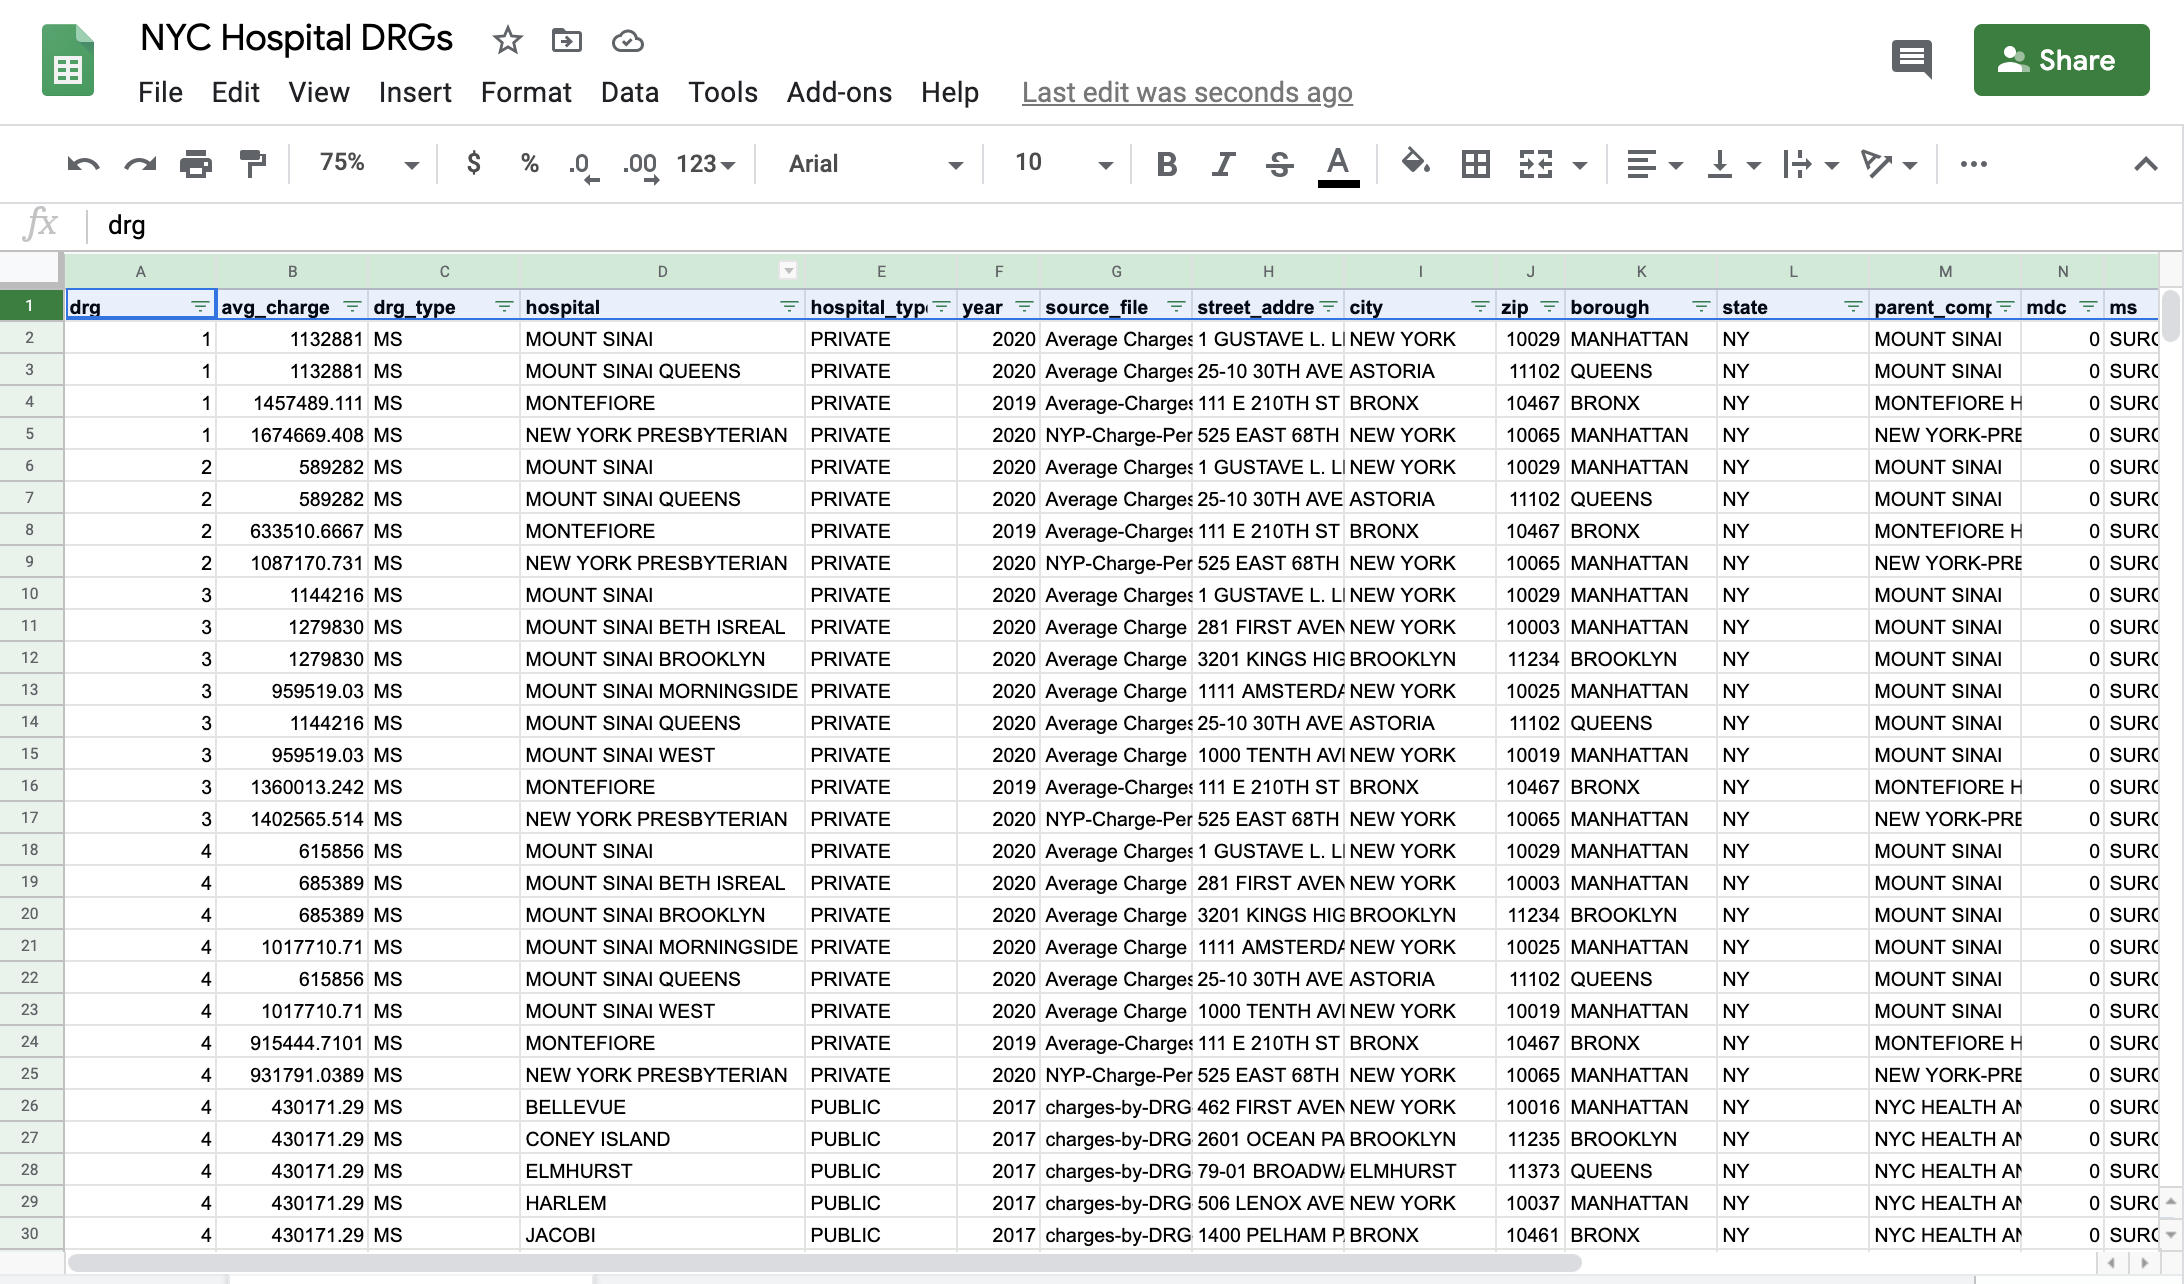


### Final Output: NYC Hospitals DRGs Data Dictionary
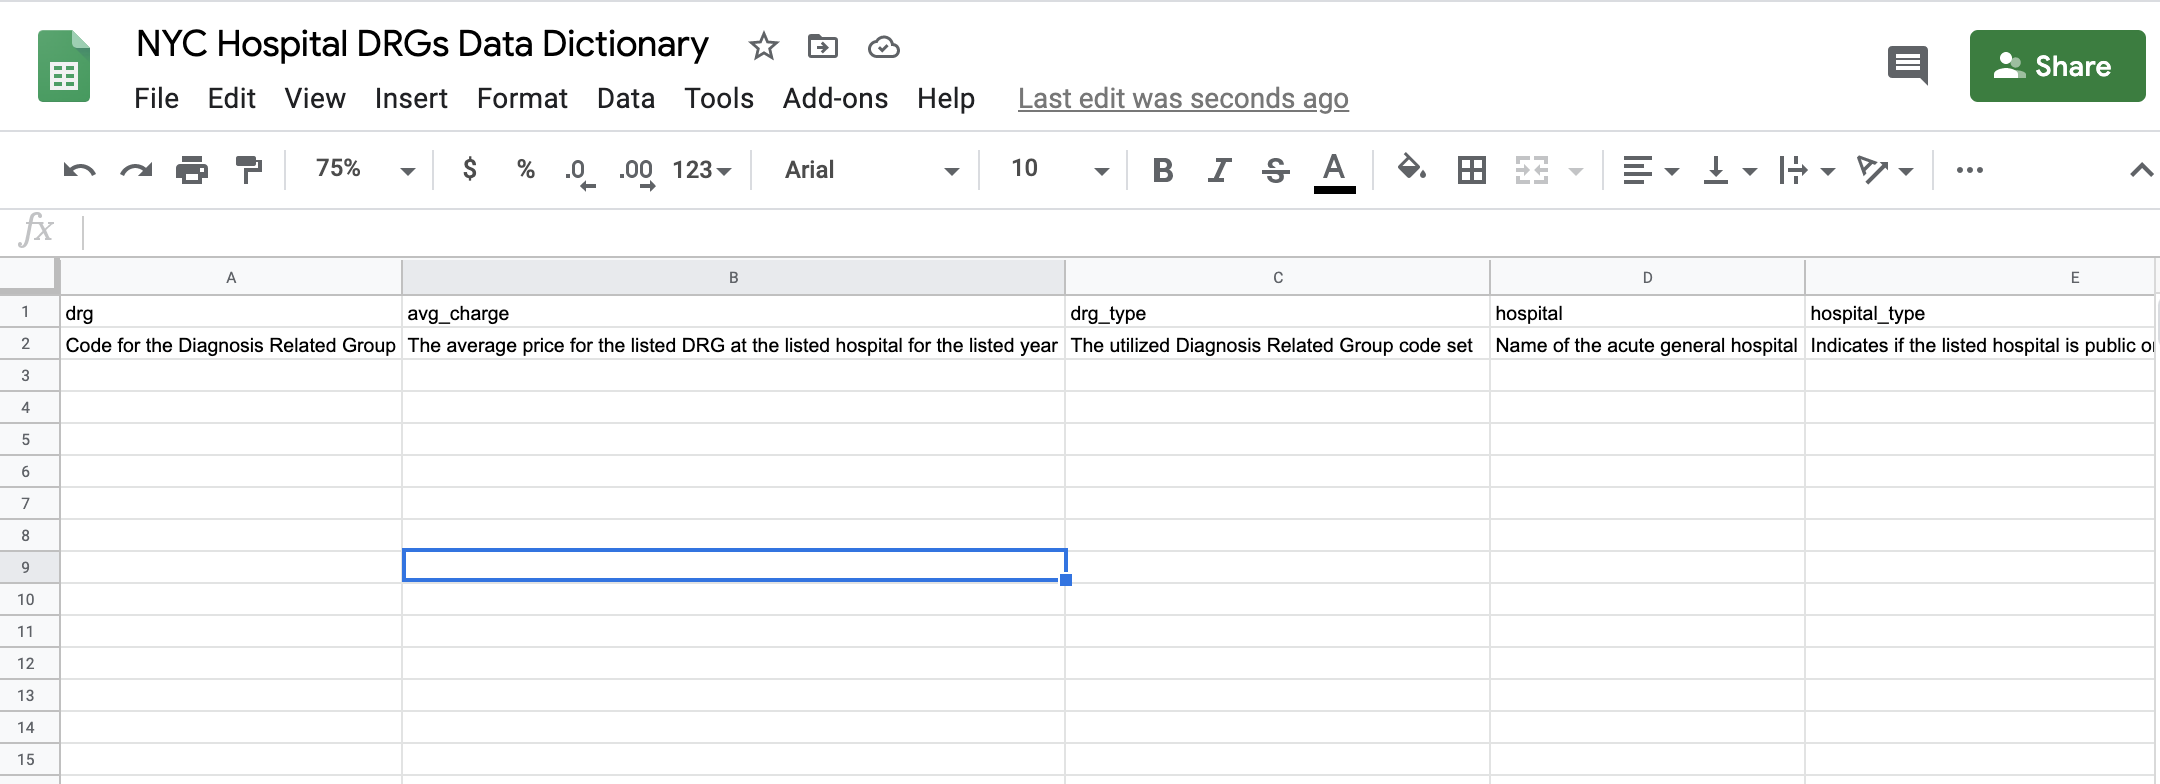

### Using the Aggregated Data for Analysis:

The aggregated data output will no doubt be helpful for analysts, consultants, and industry subject matter experts alike. But in order to make it more accessible for those looking to understand their personal costs, data visualization can be a helpful tool.

The aggregated data was cut into smaller data frames for price analysis by:
- `public_cost`: The minimum, maximum, mean, and median price by public or private hospitals
- `hospital_cost`: The minimum, maximum, mean, and median price by hospital
- `borough_cost`: The minimum, maximum, mean, and median price by NYC Borough
- `mdc_cost`: The minimum, maximum, mean, and median price by Major Diagnostic Category
- `company_cost`: The minimum, maximum, mean, and median price by the hospital's Parent Company
- `drg_cost`: The minimum, maximum, mean, and median price by the Diagnosis Related Group

These aggregate data frames will allow for easier analysis and search functionality used in the next step. 

In [47]:
# Import nyc_hospital_drg.csv
nyc_hospital_drg = pd.read_csv('nyc_hospital_drg.csv')

In [48]:
# Clean nyc_hospital_drg.csv
nyc_hospital_drg['avg_charge']= nyc_hospital_drg['avg_charge'].round(2)
nyc_hospital_drg['mdc']= nyc_hospital_drg['avg_charge'].round(2)

In [53]:
# Borough Cost: Create and Clean Data Frame
borough_cost = nyc_hospital_drg .groupby('borough')['avg_charge'].agg(['min', 'max', 'mean', 'median'])
borough_cost = borough_cost.dropna(how='any')
borough_cost = borough_cost.round(2)

borough_cost

,min,max,mean,median
borough,,,,
BRONX,4809.82,1457489.11,99239.60,61593.06
BROOKLYN,4809.82,1666900.00,71231.99,51152.50
MANHATTAN,4809.82,1674669.41,95776.14,66719.85
QUEENS,4809.82,1144216.00,83678.44,55345.00


In [50]:
# Public Cost: Create and Clean Data Frame
public_cost = nyc_hospital_drg.groupby('hospital_type')['avg_charge'].agg(['min', 'max', 'mean', 'median'])
public_cost = public_cost.dropna(how='any')
public_cost = public_cost.round(2)

#public_cost

In [52]:
# Hospital Cost: Create and Clean Data Frame
hospital_cost = nyc_hospital_drg .groupby('hospital')['avg_charge'].agg(['min', 'max', 'mean', 'median'])
hospital_cost = hospital_cost.dropna(how='any')
hospital_cost = hospital_cost.round(2)

#hospital_cost

In [63]:
# Major Diagnostic Category Cost: Create and Clean Data Frame
mdc_cost = nyc_hospital_drg.loc[(nyc_hospital_drg.mdc_description != "MDC Category Missing")].groupby('mdc_description')['avg_charge'].agg(['min', 'max', 'mean', 'median'])
mdc_cost = mdc_cost.dropna(how='any')
mdc_cost = mdc_cost.drop(['Pre-MDC'], axis=0)
mdc_cost = mdc_cost.round(2)

#mdc_cost

In [59]:
# Parent Company Cost: Create and Clean Data Frame
company_cost = nyc_hospital_drg .groupby('parent_company')['avg_charge'].agg(['min', 'max', 'mean', 'median'])
company_cost = company_cost.dropna(how='any')
company_cost = company_cost.round(2)

#company_cost

In [60]:
# Diagnosis Related Group Cost: Create and Clean Data Frame
drg_cost = nyc_hospital_drg .groupby('cms_drg_description')['avg_charge'].agg(['min', 'max', 'mean', 'median'])
drg_cost = drg_cost.dropna(how='any')
drg_cost = drg_cost.round(2)

#drg_cost

### Price Analytics Graphics
Since viewing data as a data frame makes it difficult to asses the cost comparisons, the bar charts below provide a comparative visualization for the average costs by key aggregates including:
- Borough
- Public/Private Hospital Type
- Hospital
- Hospital Parent Company
- Major Diagnostic Category 

Note, because the source of pricing provides average annual price, the `mean` value was used.

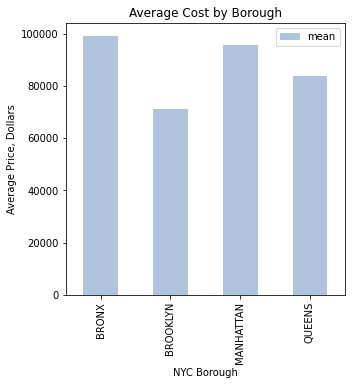

In [55]:
# Borough Cost: Bar Chart
borough_cost.reset_index().plot(kind='bar', 
                                x='borough',
                                y='mean', 
                                color='lightsteelblue', 
                                figsize=(5,5))
plt.title('Average Cost by Borough')
plt.ylabel('Average Price, Dollars')
plt.xlabel('NYC Borough')
plt.show()

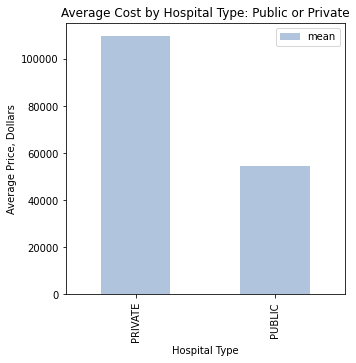

In [56]:
# Public Cost: Bar Chart
public_cost.reset_index().plot(kind='bar', 
                                x='hospital_type',
                                y='mean', 
                                color='lightsteelblue', 
                                figsize=(5,5))
plt.title('Average Cost by Hospital Type: Public or Private')
plt.ylabel('Average Price, Dollars')
plt.xlabel('Hospital Type')
plt.show()

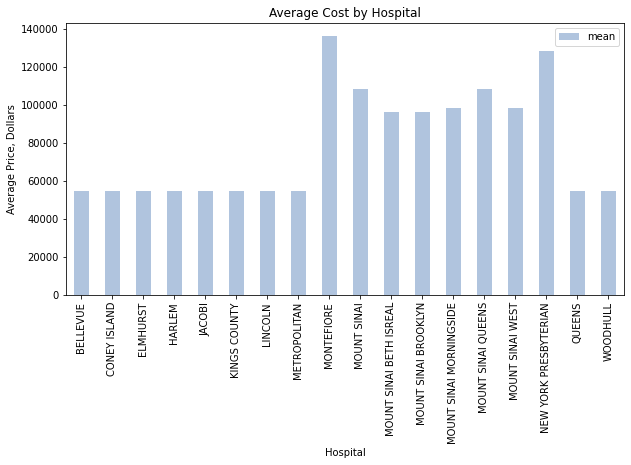

In [57]:
# Hospital Cost: Bar Chart
hospital_cost.reset_index().plot(kind='bar', 
                                x='hospital',
                                y='mean', 
                                color='lightsteelblue', 
                                figsize=(10,5))
plt.title('Average Cost by Hospital')
plt.ylabel('Average Price, Dollars')
plt.xlabel('Hospital')
plt.show()

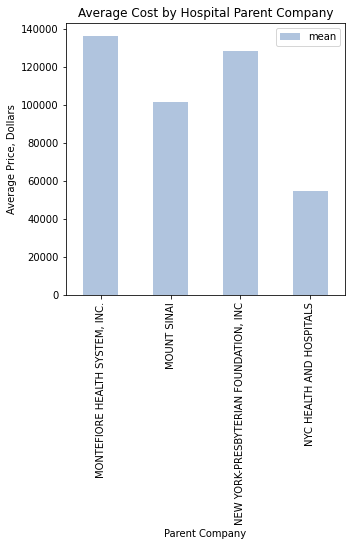

In [61]:
# Parent Company Cost: Bar Chart
company_cost.reset_index().plot(kind='bar', 
                                x='parent_company',
                                y='mean', 
                                color='lightsteelblue', 
                                figsize=(5,5))
plt.title('Average Cost by Hospital Parent Company')
plt.ylabel('Average Price, Dollars')
plt.xlabel('Parent Company')
plt.show()

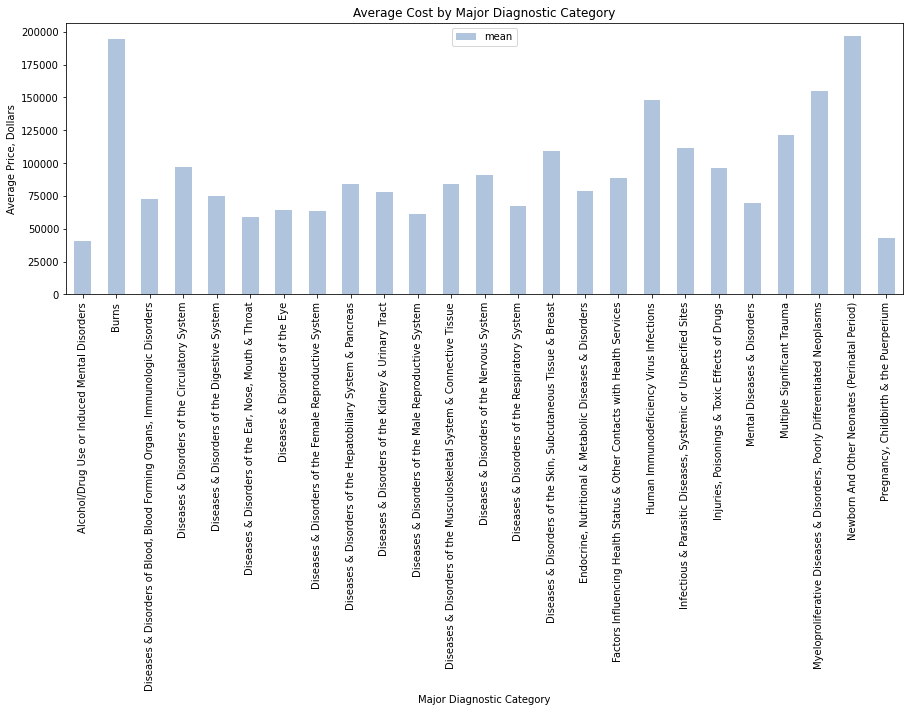

In [64]:
# Major Diagnostic Category Cost: Bar Chart
mdc_cost.reset_index().plot(kind='bar', 
                                x='mdc_description',
                                y='mean', 
                                color='lightsteelblue', 
                                figsize=(15,5))
plt.title('Average Cost by Major Diagnostic Category')
plt.ylabel('Average Price, Dollars')
plt.xlabel('Major Diagnostic Category')
plt.show()

### Hospital Price Analytics as Search Functions
Because there are multiple options that may not be relevant those utilizing the data, defined functions were created to allow for more accessible search within the aggregate categories including: 
- borough_search(): Provides cost estimates based on the borough inputed by the user
- hospital_search(): Provides cost estimates based on the hospital inputed by the user
- procedure_search(): Provides cost estimates based on the major diagnostic category or procedure inputed by the user
- diagnosis_search(): Provides filtered results for cost estimates based on the diagnosis inputed by the user

In [65]:
def borough_search():
    '''Borough Selection Price Search:
    
    Prompts user to input a borough, and provides minimum, maximum, mean, and median for available selections. 
    '''
    borough_input = input("What borough are you looking for? Please choose from: Bronx, Brooklyn, Manhattan or Queens.").upper()
    borough_list = borough_cost.reset_index()['borough'].tolist()
    if (borough_input in borough_list):
        borough_selected = borough_cost.loc[borough_input]
        print('The average cost in ', 
              borough_input.capitalize(), 
              'is $', 
              borough_selected['mean'], 
              'ranging from $', 
              borough_selected['min'], 
              'to $',
              borough_selected['max'])
    else:
        print('Sorry, there are no prices in',
              borough_input.capitalize(),
              'at this time. Please choose from:\n',
              borough_cost.reset_index()['borough'].to_string(index=False))

In [66]:
def hospital_search():
    '''Hosptial Selection Price Search:
    
    Prompts user to input a hosptial, and provides minimum, maximum, mean, and median for available selections. 
    '''
    hospital_input = input("What NYC hospital are you looking for?").upper()
    if any(hospital_cost.reset_index()['hospital'].str.upper().str.contains(hospital_input) == True):
        hospital_search_condition = hospital_cost.reset_index()['hospital'].str.upper().str.contains(hospital_input)
        hospital_selected = hospital_cost.reset_index().loc[hospital_search_condition, :]
        print('The average cost at ', 
              hospital_selected['hospital'].to_string(index=False).title(), 
              'is $', 
              hospital_selected['mean'].to_string(index=False).capitalize(), 
              'ranging from $', 
              hospital_selected['min'].to_string(index=False), 
              'to $',
              hospital_selected['max'].to_string(index=False))
    else:
        print('Sorry, there are no prices at',
              hospital_input.capitalize(),
              'at this time. Please choose from:\n',
              hospital_cost.reset_index()['hospital'].to_string(index=False))

In [67]:
def procedure_search():
    '''Procedure Selection Price Search:
    
    Prompts user to input a procedure, and provides minimum, maximum, mean, and median for available MDC. 
    '''
    procedure_input = input("What type of procedure are you looking for?").upper()
    if any(mdc_cost.reset_index()['mdc_description'].str.upper().str.contains(procedure_input) == True):
        procedure_search_condition = mdc_cost.reset_index()['mdc_description'].str.upper().str.contains(procedure_input)
        procedure_selected = mdc_cost.reset_index().loc[procedure_search_condition, :]
        print('The average cost for ', 
          procedure_selected['mdc_description'].to_string(index=False), 
          'is $', 
          procedure_selected['mean'].to_string(index=False), 
          'ranging from $', 
          procedure_selected['min'].to_string(index=False), 
          'to $', 
          procedure_selected['max'].to_string(index=False))
    else:
         print("Sorry, there are no price results for", 
               procedure_input.lower(),
               'Please select from the following options:\n',
               mdc_cost.reset_index()['mdc_description'].to_string(index=False))
        

In [68]:
def diagnosis_search():
    '''Diagnosis Selection Price Search:
    
    Prompts user to input a diagnosis, and provides a data frame on pricing for all applicable DRG's. 
    '''
    diagnosis_input = input("What types of procedure are you looking for?").upper()
    if any(drg_cost.reset_index()['cms_drg_description'].str.upper().str.contains(diagnosis_input)== True):
        diagnosis_search_condition = drg_cost.reset_index()['cms_drg_description'].str.upper().str.contains(diagnosis_input)
        diagnosis_selected = drg_cost.reset_index().loc[diagnosis_search_condition, :]
        print('I found the following pricing results for', 
              diagnosis_input.capitalize(),
              'in dollars:')
        return diagnosis_selected.rename(columns={"cms_drg_description": "Diagnosis Related Group", 
                                              "min": "Minimum Charge", 
                                              "max": "Maximum Charge", 
                                              "mean": "Average Charge",
                                              "median": "Median Charge"}).style.hide_index()
    else:
        print("Sorry, there are no price results for",
              diagnosis_input.lower(),
              ". Please see all the Diagnosis Related Group data available below:")
        return drg_cost.reset_index().rename(columns={"cms_drg_description": "Diagnosis Related Group", 
                                              "min": "Minimum Charge", 
                                              "max": "Maximum Charge", 
                                              "mean": "Average Charge",
                                              "median": "Median Charge"}).style.hide_index()

### Next Steps and Limitations

This project and analysis paints a clear picture on the variance of hospital costs within New York. In order to apply this analysis and the tools provided, next steps include:
- Aggregating Chargemasters across the U.S.
- Making the data web accessible through API development
- Revising assumptions with help from subject matter experts and licensing, making the project open source

But making health care data accessible is only the first step in true price transparency; Understanding the underlying health care data is the crucial, and much more challenging task at hand. 

Hospital chargemasters only provide insight into the average listed price for their top Diagnosis Related Groups. Most patients seeking care are insured through different products that not only limit their out of pocket expenses, but also potentially limit the health care providers and hospitals they are able to access. Understanding this would take coordination with Health Insurance Companies, State, and Federal Government alike to make accurate assumptions.

Additionally, not all services or procedures are available or identifiable with Diagnosis Related Groups, let alone services or procedures provided outside of a hospital setting. For this, more advocacy and policy is needed to make health care data a publicly accessible asset.